### ALL REQUIRED IMPORTS

In [1]:
import string
import csv, sys
from pandas import Series, DataFrame
import pandas as pd
import os
import glob
import fnmatch
import json
import nltk
from pprint import pprint

In [4]:
while True:
    try:
        # Note: Python 2.x users should use raw_input, the equivalent of 3.x's input
        age = int(input("Please enter your age: "))
    except ValueError:
        print("Sorry, I didn't understand that.")
        #better try again... Return to the start of the loop
        continue
    else:
        #age was successfully parsed!
        #we're ready to exit the loop.
        break
if age >= 18: 
    print("You are able to vote in the United States!")
else:
    print("You are not able to vote in the United States.")


Please enter your age: 2
You are not able to vote in the United States.


In [5]:
age

2

In [2]:
from googlemaps import GoogleMaps

ImportError: cannot import name 'GoogleMaps'

In [3]:
input_var = input("Enter something: ")
print ("you entered " + input_var) 

Enter something: ccx
you entered ccx


In [2]:
from googlemaps import GoogleMaps
gmaps = GoogleMaps(api_key)
address = 'Constitution Ave NW & 10th St NW, Washington, DC'
lat, lng = gmaps.address_to_latlng(address)
print (lat, lng)
#38.8921021 -77.0260358

ImportError: cannot import name 'GoogleMaps'

In [3]:
from geopy.geocoders import geolocate
geolocator = Nominatim()
location = geolocator.geocode("175 5th Avenue NYC")
print(location.address)
print((location.latitude, location.longitude))

ImportError: cannot import name 'geolocate'

In [5]:
from geolocation.main import geolocate 
from geolocation.distance_matrix.client import DistanceMatrixApiClient

address = "NEW York City Wall Street 12"

google_maps = GoogleMaps(api_key=’your_google_maps_key’)

location = google_maps.search(location=address) # sends search to Google Maps.

print(location.all()) # returns all locations.

my_location = location.first() # returns only first location.

print(my_location.city) print(my_location.route) print(my_location.street_number) print(my_location.postal_code)

for administrative_area in my_location.administrative_area:
print(“{}: {} ({})”.format(administrative_area.area_type,
administrative_area.name, administrative_area.short_name))
print(my_location.country) print(my_location.country_shortcut)

print(my_location.formatted_address)

print(my_location.lat) print(my_location.lng)

# reverse geocode

lat = 40.7060008 lng = -74.0088189

my_location = google_maps.search(lat=lat, lng=lng).first()

SyntaxError: invalid character in identifier (<ipython-input-5-cd3b3d12229c>, line 6)

In [4]:
from googlemaps import Client

In [6]:
#dir(Client)

In [5]:
import geography


SyntaxError: invalid syntax (geography.py, line 3)

In [6]:
import requests
from bs4 import BeautifulSoup

In [7]:
from geopy.geocoders import Nominatim
from googlemaps import Client


In [8]:
address = 'Constitution Ave NW & 10th St NW, Washington, DC'

In [9]:
destination = gmaps.latlng_to_address(38.887563, -77.019929)

NameError: name 'gmaps' is not defined

In [11]:
from geopy.geocoders import Nominatim
geolocator = Nominatim()
location = geolocator.geocode("Smith Street")
print(location.address)
print((location.latitude, location.longitude))

Smith Street, Chinatown, Outram, Singapore, Central Singapore Community Development Council, 058954, Singapore
(1.2826039, 103.84366)


In [ ]:
from urllib.request import urlopen
#from urllib2 import urlopen

response = urlopen('http://url.com/')

from bs4 import BeautifulSoup

soup = BeautifulSoup(response.read(), from_encoding=response.headers.getparam('charset'))

In [1]:
from urllib.request import urlopen
html = urlopen("http://www.google.com/")
print(html)

In [ ]:
from urllib.request import urlopen

link = "https://www.zomato.com/singapore"
f = urllib.request.urlopen(link)
myfile = f.read()
print(f.text)

In [13]:
import urllib.request
with urllib.request.urlopen("https://www.zomato.com/boston/island-creek-oyster-bar-fenway-kenmore/menu?utm_source=api_basic_user&utm_medium=api&utm_campaign=v2.1&openSwipeBox=menu&showMinimal=1#tabtop") as url:
    s = url.read()
    pprint(s)

TimeoutError: [Errno 60] Operation timed out

In [16]:
import urllib.request
import socket
try:
    timeout = 600
    with urllib.request.urlopen("https://www.zomato.com/singapore/jaan-downtown-core",timeout=500) as url:
        s = url.read()
        pprint(s)
    socket.setdefaulttimeout(timeout)
except socket.error as socketerror:
        print("Error: ", socketerror)

Error:  [Errno 60] Operation timed out


In [33]:


    
import re
from bs4 import BeautifulSoup
import urllib.request

# Import Custom libraries
#from BeautifulSoup import BeautifulSoup, BeautifulStoneSoup

def render_google_uri(idict):
    '''
    Render the appropriate Google Map Api request uri
    '''
    base_url = "http://maps.googleapis.com/maps/api/geocode/xml?"
    options = [(key,re.sub("\s+", "+", value)) for (key, value) in idict.items()]

    options = map(lambda x: "=".join(x), options)
    options = "&".join(options)
    url = base_url + options
    return url

def get_street_position(*args):
    '''
    Longitude and Latitude from Street Address
    '''
    def is_result(itag):
        if itag.name == "result":
            if itag.type.text == "locality":
                return True
        return False

    ret_list = []
    for address in args:
        google_api_dict = \
        {
            "address" : address,
            "sensor"  : "false",
        }
        request_uri = render_google_uri(google_api_dict)
        request = urllib.request(request_uri, None, {})
        try:
            response = urllib.urlopen(request)
            the_page = response.read()
        except Exception:
            the_page = ""

        if the_page:
            pool = BeautifulStoneSoup(the_page)
            result = pool.find(is_result)

            if result:
                bounds = result.find("bounds")

                if bounds:

                    cur_dict = \
                    {
                        "Address"        : address,
                        "Google Address" : result.formatted_address.text,
                        "Bounds"         : \
                        {
                            "SW" :
                            {
                                "Longitude" : bounds.southwest.lng.text,
                                "Latitude"  : bounds.southwest.lat.text
                            },
                            "NE" :
                            {
                                "Longitude" : bounds.northeast.lng.text,
                                "Latitude"  : bounds.northeast.lat.text
                            }
                        }
                    }
                    ret_list += [cur_dict]

    return ret_list

if __name__ == "__main__":
    print (get_street_position("Sydney", "Marrakech"))


    

TimeoutError: [Errno 60] Operation timed out

In [32]:
import socket
timeout = 100

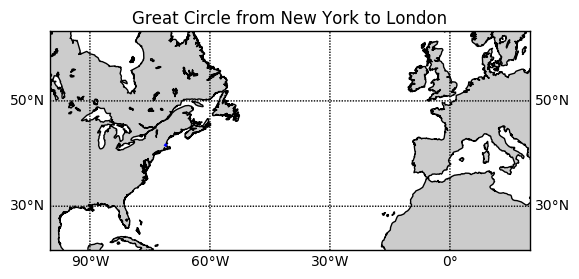

In [35]:
from mpl_toolkits.basemap import Basemap
import numpy as np
import matplotlib.pyplot as plt
# create new figure, axes instances.
fig=plt.figure()
ax=fig.add_axes([0.1,0.1,0.8,0.8])
# setup mercator map projection.
m = Basemap(llcrnrlon=-100.,llcrnrlat=20.,urcrnrlon=20.,urcrnrlat=60.,\
            rsphere=(6378137.00,6356752.3142),\
            resolution='l',projection='merc',\
            lat_0=40.,lon_0=-20.,lat_ts=20.)
# nylat, nylon are lat/lon of New York
#42.3333084583333, -71.09771825
nylat = 42.3333084583333; nylon = -71.09771825
# lonlat, lonlon are lat/lon of London.
lonlat = 42.3489867000; lonlon = -71.0814983000
# draw great circle route between NY and London
m.drawgreatcircle(nylon,nylat,lonlon,lonlat,linewidth=2,color='b')
m.drawcoastlines()
m.fillcontinents()
# draw parallels
m.drawparallels(np.arange(10,90,20),labels=[1,1,0,1])
# draw meridians
m.drawmeridians(np.arange(-180,180,30),labels=[1,1,0,1])
ax.set_title('Great Circle from New York to London')
plt.show()

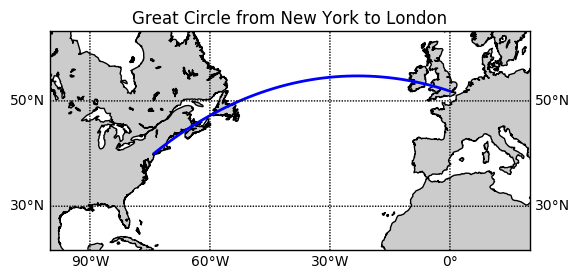

In [40]:
from mpl_toolkits.basemap import Basemap
import numpy as np
import matplotlib.pyplot as plt
# create new figure, axes instances.
fig=plt.figure()
ax=fig.add_axes([0.1,0.1,0.8,0.8])
# setup mercator map projection.
m = Basemap(llcrnrlon=-100.,llcrnrlat=20.,urcrnrlon=20.,urcrnrlat=60.,\
            rsphere=(6378137.00,6356752.3142),\
            resolution='l',projection='merc',\
            lat_0=40.,lon_0=-20.,lat_ts=20.)
# nylat, nylon are lat/lon of New York
nylat = 40.78; nylon = -73.98
# lonlat, lonlon are lat/lon of London.
lonlat = 51.53; lonlon = 0.08
# draw great circle route between NY and London
m.drawgreatcircle(nylon,nylat,lonlon,lonlat,linewidth=2,color='b')
m.drawcoastlines()
m.fillcontinents()
# draw parallels
m.drawparallels(np.arange(10,90,20),labels=[1,1,0,1])
# draw meridians
m.drawmeridians(np.arange(-180,180,30),labels=[1,1,0,1])
ax.set_title('Great Circle from New York to London')
plt.show()

In [43]:
import re
from bs4 import BeautifulSoup
import urllib

# Import Custom libraries
from BeautifulSoup import BeautifulSoup, BeautifulStoneSoup

def render_google_uri(idict):
    '''
    Render the appropriate Google Map Api request uri
    '''
    base_url = "http://maps.googleapis.com/maps/api/geocode/xml?"
    options = [(key,re.sub("\s+", "+", value)) for (key, value) in idict.items()]

    options = map(lambda x: "=".join(x), options)
    options = "&".join(options)
    url = base_url + options
    return url

def get_street_position(*args):
    '''
    Longitude and Latitude from Street Address
    '''
    def is_result(itag):
        if itag.name == "result":
            if itag.type.text == "locality":
                return True
        return False

    ret_list = []
    for address in args:
        google_api_dict = \
        {
            "address" : address,
            "sensor"  : "false",
        }
        request_uri = render_google_uri(google_api_dict)
        request = urllib2.Request(request_uri, None, {})


ImportError: No module named 'BeautifulSoup'

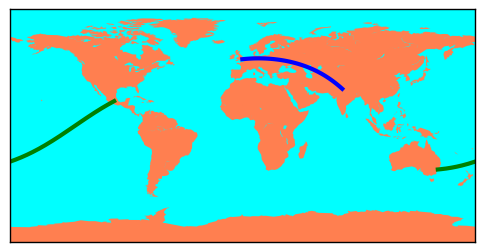

In [6]:
from mpl_toolkits.basemap import Basemap
import numpy as np
import matplotlib.pyplot as plt


m = Basemap(projection='cyl', lon_0=0, resolution='c')

m.fillcontinents(color='coral',lake_color='aqua')
m.drawmapboundary(fill_color='aqua')

places = {'Mexico City': (19.05, -99.366667),
          'London': (51.507222, -0.1275),
          'Sydney': (-33.859972, 151.211111),
          'Cape Town': (-33.925278, 18.423889),
          'Delhi': (28.61, 77.23),
          }

network = [
           ('London', 'Delhi'),
           ('Mexico City', 'Sydney'),
           ]


for source, target in network:
    lat1, lon1 = places[source]
    lat2, lon2 = places[target]
    line, = m.drawgreatcircle(lon1, lat1, lon2, lat2, lw=3)

    p = line.get_path()
    # find the index which crosses the dateline (the delta is large)
    cut_point = np.where(np.abs(np.diff(p.vertices[:, 0])) > 200)[0]
    if cut_point:
        cut_point = cut_point[0]

        # create new vertices with a nan inbetween and set those as the path's vertices
        new_verts = np.concatenate(
                                   [p.vertices[:cut_point, :], 
                                    [[np.nan, np.nan]], 
                                    p.vertices[cut_point+1:, :]]
                                   )
        p.codes = None
        p.vertices = new_verts


plt.show()

In [1]:
import gmplot

gmap = gmplot.GoogleMapPlotter(37.428, -122.145, 16)

gmap.plot(latitudes, longitudes, 'cornflowerblue', edge_width=10)
gmap.scatter(more_lats, more_lngs, '#3B0B39', size=40, marker=False)
gmap.scatter(marker_lats, marker_lngs, 'k', marker=True)
gmap.heatmap(heat_lats, heat_lngs)

gmap.draw("mymap.html")

NameError: name 'latitudes' is not defined

In [8]:
from gmplot import GoogleMapPlotter

ImportError: No module named 'gmplot'

In [3]:
gmap = gmplot.from_geocode("San Francisco")

AttributeError: module 'gmplot' has no attribute 'from_geocode'

In [16]:
import gmplot

gmap = gmplot.GoogleMapPlotter(37.428, -122.145, 16)

gmap.plot(latitudes, longitudes, 'cornflowerblue', edge_width=10)
gmap.scatter(more_lats, more_lngs, '#3B0B39', size=40, marker=False)
gmap.scatter(marker_lats, marker_lngs, 'k', marker=True)
gmap.heatmap(heat_lats, heat_lngs)

gmap.draw("mymap.html")

NameError: name 'latitudes' is not defined

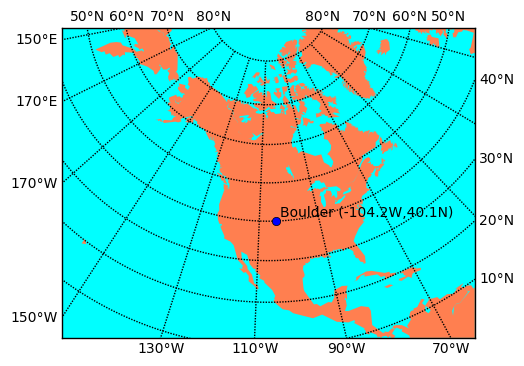

In [15]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import numpy as np
# setup Lambert Conformal basemap.
m = Basemap(width=12000000,height=9000000,projection='lcc',
            resolution='c',lat_1=45.,lat_2=55,lat_0=50,lon_0=-107.)
# draw a boundary around the map, fill the background.
# this background will end up being the ocean color, since
# the continents will be drawn on top.
m.drawmapboundary(fill_color='aqua')
# fill continents, set lake color same as ocean color.
m.fillcontinents(color='coral',lake_color='aqua')
# draw parallels and meridians.
# label parallels on right and top
# meridians on bottom and left
parallels = np.arange(0.,81,10.)
# labels = [left,right,top,bottom]
m.drawparallels(parallels,labels=[False,True,True,False])
meridians = np.arange(10.,351.,20.)
m.drawmeridians(meridians,labels=[True,False,False,True])
# plot blue dot on Boulder, colorado and label it as such.
lon, lat = -104.237, 40.125 # Location of Boulder
# convert to map projection coords.
# Note that lon,lat can be scalars, lists or numpy arrays.
xpt,ypt = m(lon,lat)
# convert back to lat/lon
lonpt, latpt = m(xpt,ypt,inverse=True)
m.plot(xpt,ypt,'bo')  # plot a blue dot there
# put some text next to the dot, offset a little bit
# (the offset is in map projection coordinates)
plt.text(xpt+100000,ypt+100000,'Boulder (%5.1fW,%3.1fN)' % (lonpt,latpt))
plt.show()

In [17]:
import gmplot

gmap = gmplot.GoogleMapPlotter(37.428, -122.145, 16)

In [20]:
gmap.draw("mymap.html")

In [22]:
import os
from setuptools import setup, find_packages

__version__ = '1.1.1'

def read(fname):
    return open(os.path.join(os.path.dirname(__file__), fname)).read()

setup(
    name = 'gmplot',
    version = __version__,
    author = 'Michael Woods',
    author_email = 'physicsmichael@gmail.com',
    url = 'https://github.com/vgm64/gmplot',
    description = 'Provide a matplotlib like interface to plotting data with Google Maps',
    long_description=read('README.rst'),
    license='MIT',
    keywords='python wrapper google maps',
    packages = find_packages(),
    include_package_data=True,
    package_data = {
        'gmplot': ['markers/*.png'],
    },
    install_requires=['requests'],
)

NameError: name '__file__' is not defined

In [20]:
place_data = {"Boston"}
for place in place_data['stop_name']:
    r = requests.get('http://nominatim.openstreetmap.org/?q='+place+'&format=json')
    place_data[place] = r.json()

SyntaxError: invalid character in identifier (<ipython-input-20-c84fec6308ae>, line 3)